In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.read_csv('data/titles.csv')
titles.head()

,title,year
0,Zenka - dosu arashi,1969
1,Not My Sister,1916
2,Salvage,2017
3,Ikaw kasi,1955
4,Mistress,2018


In [4]:
cast = pd.read_csv('data/cast.csv')
cast.head()

,title,year,name,type,character,n
0,Closet Monster,2015,Buffy #1,actor,Buffy 4,31.0
1,Suuri illusioni,1985,Homo $,actor,Guests,22.0
2,Battle of the Sexes,2017,$hutter,actor,Bobby Riggs Fan,10.0
3,Secret in Their Eyes,2015,$hutter,actor,2002 Dodger Fan,NaN
4,Steve Jobs,2015,$hutter,actor,1988 Opera House Patron,NaN


### What are the ten most common movie names of all time?

In [17]:
titles.groupby('title').size().sort_values(ascending = False).head(10) #.count().sort_values('year', ascending = False).head(10)

title
Hamlet                  20
Carmen                  17
Macbeth                 16
The Outsider            12
Maya                    11
Temptation              11
Othello                 11
The Three Musketeers    11
Freedom                 11
Honeymoon               10
dtype: int64

### Which three years of the 1930s saw the most films released?

In [19]:
thirties = cast[((cast['year']// 10 *10) == 1930)]

In [84]:
thirties['year'].value_counts().head(3)

1937    27551
1936    25665
1938    25401
Name: year, dtype: int64

In [25]:
thirties.groupby('year').size().sort_values(ascending = False).head(3)

year
1937    27551
1936    25665
1938    25401
dtype: int64

### Plot the number of films that have been released each decade over the history of cinema.

In [29]:
c = cast
c['decade'] = ( c['year']//10 * 10)

<AxesSubplot:xlabel='decade'>

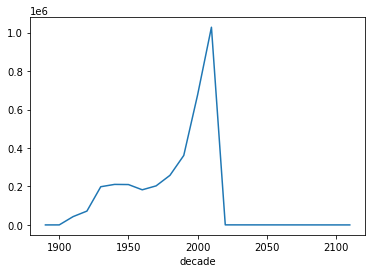

In [35]:
c.groupby('decade').size().sort_index().plot()

### Plot the number of "Hamlet" films made each decade.

In [44]:
ham = c[(c['title'] == 'Hamlet') & (c['n'] == 1.0)]

In [45]:
ham.head()

,title,year,name,type,character,n,decade
1547,Hamlet,1996,Riz Abbasi,actor,Attendant to Claudius,1.0,1990
286513,Hamlet,1964,Richard Burton,actor,Hamlet,1.0,1960
452123,Hamlet,1976,Quentin Crisp,actor,Polonius,1.0,1970
756211,Hamlet,1990,Mel Gibson,actor,Hamlet,1.0,1990
879309,Hamlet,2000,Ethan Hawke,actor,Hamlet,1.0,2000


<AxesSubplot:xlabel='decade'>

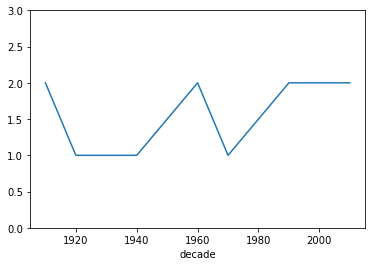

In [50]:
ham.groupby(['decade']).size().sort_index().plot(ylim = (0,3))

### Plot the number of "Rustler" characters in each decade of the history of film.

In [52]:
rust = c[c['character'] == "Rustler"]

<AxesSubplot:xlabel='decade'>

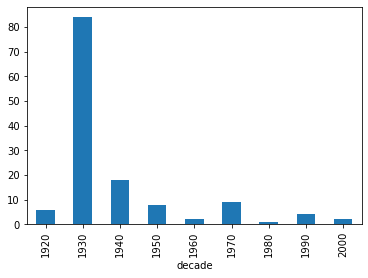

In [57]:
rust.groupby('decade').size().plot(kind = 'bar')

### Plot the number of "Hamlet" characters each decade.

In [58]:
hamlet = c[c['character'] == "Hamlet"]

<AxesSubplot:xlabel='decade'>

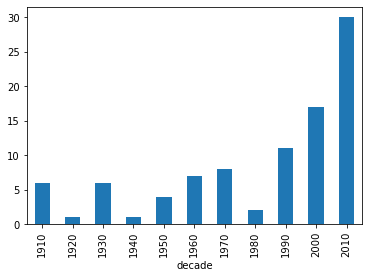

In [61]:
hamlet.groupby('decade').size().plot(kind='bar')

### What are the 11 most common character names in movie history?

In [65]:
c.groupby('character').size().sort_values(ascending = False).head(11)

character
Himself        19637
Dancer         12019
Extra          10848
Reporter        7818
Doctor          6963
Party Guest     6786
Student         6631
Policeman       6424
Bartender       6290
Herself         6269
Minor Role      6203
dtype: int64

### Who are the 10 people most often credited as "Herself" in film history?

In [68]:
her = c[c['character'] == 'Herself']

In [75]:
her.groupby('name').size().sort_values(ascending=False).head(10)

name
Queen Elizabeth II           11
María Luisa (V) Martín        9
Luisa Horga                   9
Joyce Brothers                8
Hillary Clinton               8
Margaret Thatcher             8
María Isabel (III) Martín     6
Marilyn Monroe                6
Marta Berrocal                6
Rekha                         6
dtype: int64

### Who are the 10 people most often credited as "Himself" in film history?

In [76]:
him = c[c['character'] == 'Himself']

In [77]:
him.groupby('name').size().sort_values(ascending=False).head(10)

name
Adolf Hitler             91
Richard Nixon            43
Ronald Reagan            37
John F. Kennedy          35
George W. Bush           24
Winston Churchill        24
Martin Luther King       23
Bill Clinton             22
Benito Mussolini         21
Franklin D. Roosevelt    20
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1945?

In [80]:
c[c['year'] == 1945].groupby('name').size().sort_values(ascending = False).head()

name
Emmett Vogan       37
Sam (II) Harris    31
Harold Miller      28
Bess Flowers       28
Franklyn Farnum    27
dtype: int64

In [82]:
c[c['year'] == 1945].count()

title        18058
year         18058
name         18058
type         18058
character    18058
n             7382
decade       18058
dtype: int64

### Which actors or actresses appeared in the most movies in the year 1985?

In [85]:
c[c['year'] == 1985].groupby('name').size().sort_values(ascending = False).head()

name
Mammootty        22
Sukumari         20
Shakti Kapoor    19
Mohanlal         15
Lou Scheimer     15
dtype: int64

### Plot how many roles Mammootty has played in each year of his career.

<AxesSubplot:>

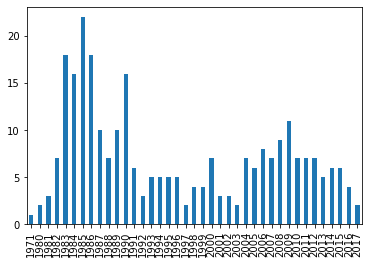

In [91]:
cast[cast['name'] == 'Mammootty']['year'].value_counts().sort_index().plot(kind = 'bar')

### What are the 10 most frequent roles that start with the phrase "Patron in"?

In [95]:
patron = cast[cast['character'].str.startswith('Patron in')]

In [96]:
patron.head()

,title,year,name,type,character,n,decade
19696,Let It Ride,1989,Ralph Ahn,actor,Patron in Chinese Restaurant,43.0,1980
22711,Alex Cross,2012,Anthony Akins,actor,Patron in restaurant,NaN,2010
24240,Missing Pieces,2012,Rico Alago,actor,Patron in Restaurant,NaN,2010
28847,The Black Bird,1975,John Alderman,actor,Patron in Ballroom,NaN,1970
30914,Sparkle,2012,Eligah Alexander Jr.,actor,Patron in Audience,NaN,2010


In [98]:
patron['character'].value_counts().head(10)

Patron in Frisky Rabbit         16
Patron in Chinese Restaurant     9
Patron in the Coffee House       8
Patron in Billiard Parlor        5
Patron in restaurant             3
Patron in cabaret                3
Patron in Club                   3
Patron in Restaurant             3
Patron in Bar                    3
Patron in Audience               2
Name: character, dtype: int64

### What are the 10 most frequent roles that start with the word "Science"?

In [102]:
cast[cast['character'].str.startswith('Science')]['character'].value_counts().head(10)

Science Teacher         57
Science Fair Student     9
Science Student          6
Science Fair Judge       6
Science Kid              5
Science Fair Kid         5
Science Reporter         5
Science                  4
Science Officer          3
Science teacher          3
Name: character, dtype: int64

### Plot the n-values of the roles that Judi Dench has played over her career.

In [106]:
judi = cast[cast['name'] == 'Judi Dench']

<AxesSubplot:xlabel='year', ylabel='n'>

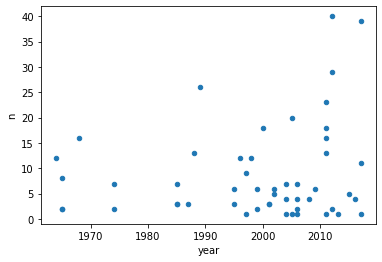

In [107]:
judi.plot(x = 'year', y = 'n', kind='scatter')

### Plot the n-values of Cary Grant's roles through his career.

In [108]:
cary = cast[cast['name'] == 'Cary Grant']

In [119]:
cary.count()

title        79
year         79
name         79
type         79
character    79
n            73
decade       79
dtype: int64

<AxesSubplot:xlabel='year', ylabel='n'>

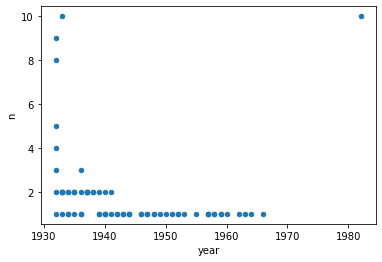

In [113]:
cary.plot(x = 'year', y = 'n', kind = 'scatter')

### Plot the n-value of the roles that Sidney Poitier has acted over the years.

In [116]:
sid = cast[cast['name'] == 'Sidney Poitier']

<AxesSubplot:xlabel='year', ylabel='n'>

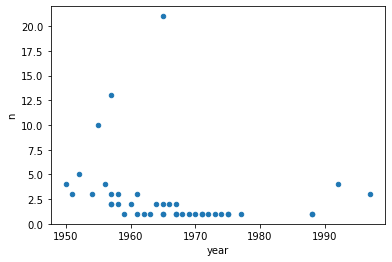

In [118]:
sid.plot(x = 'year', y = 'n', kind = 'scatter')

### How many leading (n=1) roles were available to actors, and how many to actresses, in the 1950s?

In [127]:
cast[(cast['decade'] == 1950) & (cast['n'] == 1.0)].groupby('type').size()

type
actor      6482
actress    2985
dtype: int64

### How many supporting (n=2) roles were available to actors, and how many to actresses, in the 1950s?